Saving Hotelreservation(1).csv to Hotelreservation(1) (2).csv


<ipython-input-4-251ef6abeb62>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cancelled (0/1)'], palette="pastel")


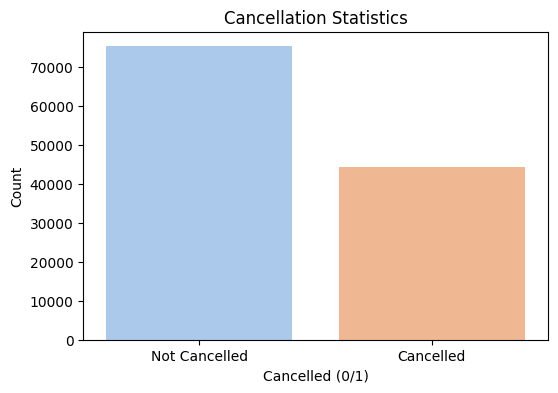

<ipython-input-4-251ef6abeb62>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
<ipython-input-4-251ef6abeb62>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")


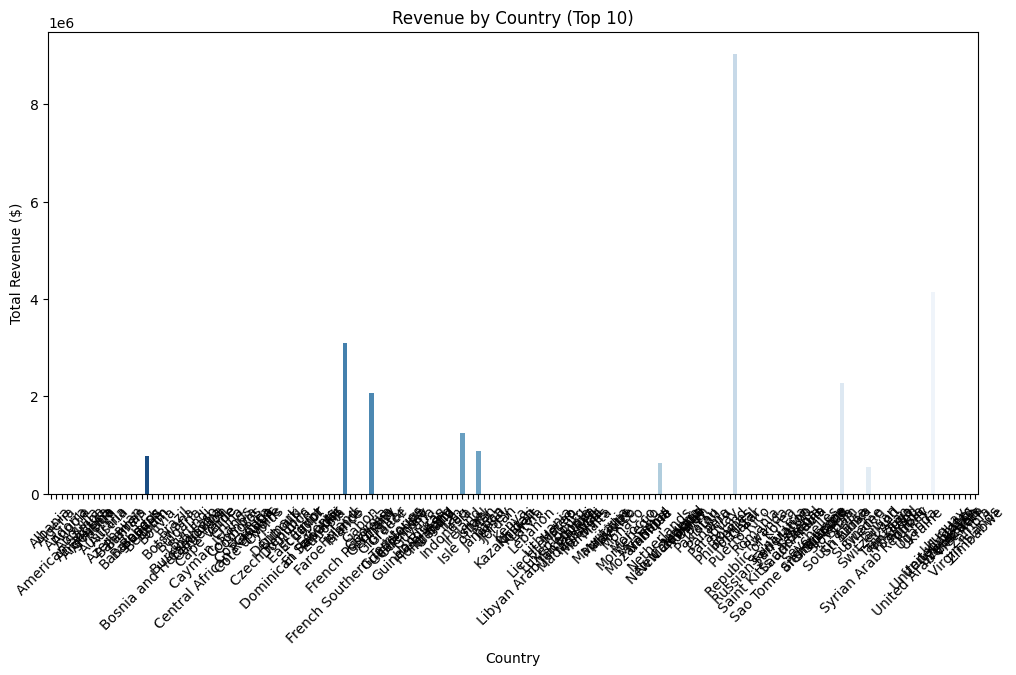

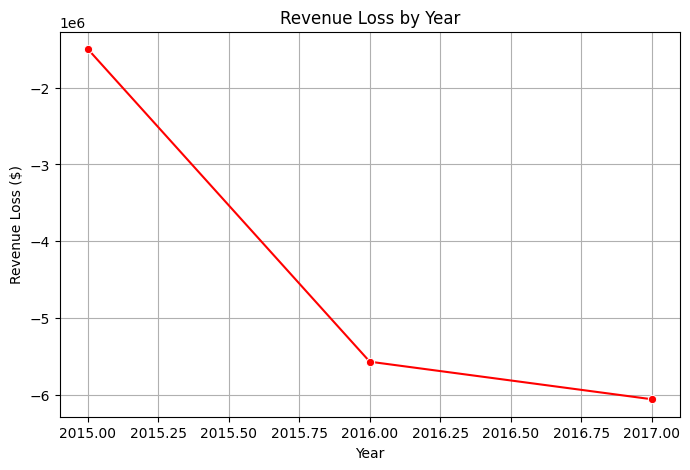

<ipython-input-4-251ef6abeb62>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Avg Daily Rate'], palette="coolwarm")


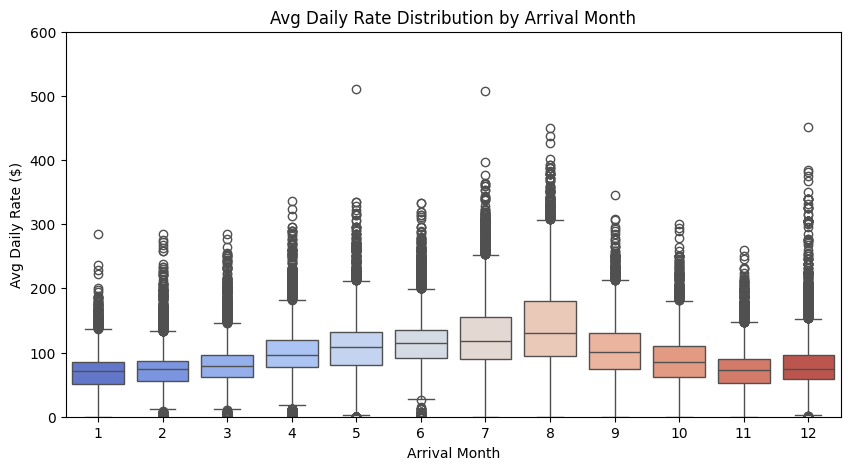

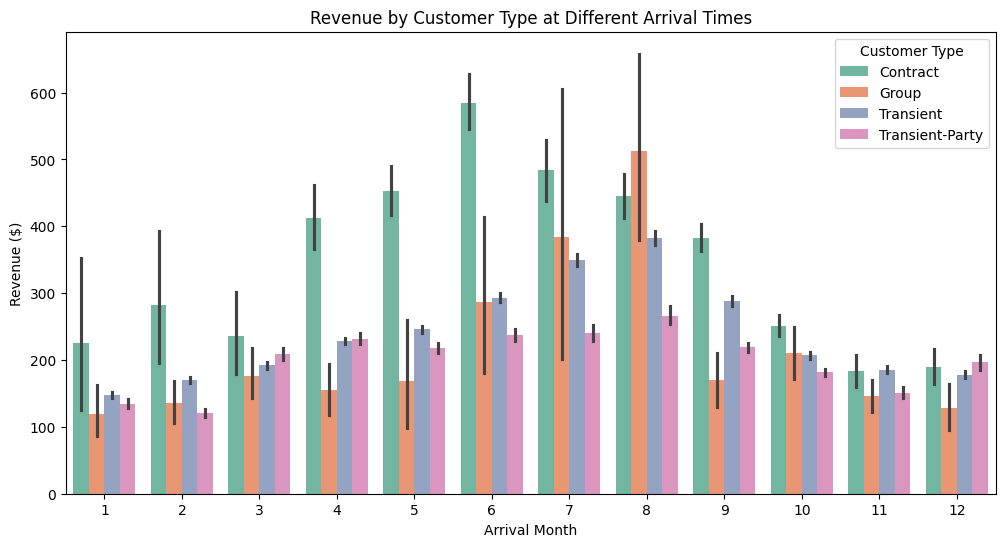

In [4]:
# Step 1: Upload the file manually in Colab
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "Hotelreservation(1).csv"
df = pd.read_csv(file_path)

# Step 3: Data Cleaning
# Convert date columns to datetime
df['Booking Date'] = pd.to_datetime(df['Booking Date'])
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Status Update'] = pd.to_datetime(df['Status Update'])

# Convert currency columns to numeric (remove "$" and convert to float)
for col in ['Avg Daily Rate', 'Revenue', 'Revenue Loss']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Convert categorical columns to category type
categorical_cols = ['Hotel', 'Distribution Channel', 'Customer Type', 'Country', 'Deposit Type', 'Status']
df[categorical_cols] = df[categorical_cols].astype('category')

# Step 4: Visualization

## 1. Cancellation Statistics
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Cancelled (0/1)'], palette="pastel")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.ylabel("Count")
plt.title("Cancellation Statistics")
plt.show()

## 2. Revenue by Country
plt.figure(figsize=(12, 6))
top_countries = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue ($)")
plt.title("Revenue by Country (Top 10)")
plt.show()

## 3. Revenue Loss by Year
df['Year'] = df['Arrival Date'].dt.year  # Extract year
revenue_loss_year = df.groupby("Year")["Revenue Loss"].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=revenue_loss_year.index, y=revenue_loss_year.values, marker='o', color='red')
plt.ylabel("Revenue Loss ($)")
plt.title("Revenue Loss by Year")
plt.grid()
plt.show()


# 4. Avg Daily Rate Distribution by Arrival Time (with adjusted Y-axis)
df['Month'] = df['Arrival Date'].dt.month  # Extract month

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Month'], y=df['Avg Daily Rate'], palette="coolwarm")

plt.xlabel("Arrival Month")
plt.ylabel("Avg Daily Rate ($)")
plt.title("Avg Daily Rate Distribution by Arrival Month")

# Set Y-axis limit for better visibility
plt.ylim(0, 600)

plt.show()

## 5. Revenue by Customer Type & Arrival Time
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Month'], y=df['Revenue'], hue=df['Customer Type'], palette="Set2")
plt.xlabel("Arrival Month")
plt.ylabel("Revenue ($)")
plt.title("Revenue by Customer Type at Different Arrival Times")
plt.legend(title="Customer Type")
plt.show()
